In [1]:
import numpy as np # Númerica
import matplotlib.pyplot as plt # Gráficas
from scipy.integrate import quad, trapezoid, simpson, tplquad, fixed_quad # Integracón
from scipy.interpolate import CubicSpline, interp1d, lagrange # Interpolación
from scipy.optimize import fsolve, root_scalar, newton # Raíces
from scipy.stats import linregress # Regresión
import sympy as sp # Simbólica

# Parcial I - Métodos Computacionales
**2024-2**

---

*Nombre:* Miguel Ángel Jaramillo Valencia

*Identificación:* 1000762075

---
* Sea honest@
* El uso de herramientas de IA no está permitido
* Puede consultar la documentación de las librerias.
* Sea ordendado dando la solución a cada punto.
* *Asegurese que el notebook corra completamente*
* Suba su notebook al GitHub del curso y recuerde hacer pull-request

# 1

**(40 puntos)** La velocidad del agua $v$ [m/s] en la descarga de un tanque cilindrico a través de un tubo largo (como se muestra en la figura) se puede calcular como:

$$
v = \sqrt{2gH}\tanh{\left(\frac{\sqrt{2gH}}{2L}t\right)}
$$



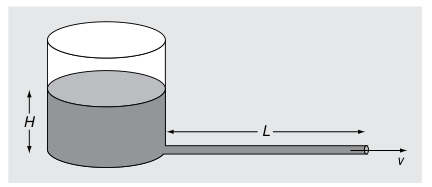

donde $g$ = 9.81 m/s$^2$, H es la carga hidrostática inicial (m), L la longitud del tubo (m) y $t$ el tiempo transcurrido (s).

*a)* Escriba una función explicita para encontrar la velocidad de descarga en función de las variables asociadas.

*b)* Realice un gráfico de $v(H)$ para $0\leq H\leq 5$, con $L = 4$ m y para $t = 2.5$ s

*c)* Suponga que quiere conocer la carga hidrostática necesaria para tener una velocidad de 5 m/s transcurridos 2.5 s. Identifique gráficamente este valor.

*d)* Realice una función que encuentre la raiz usando el método de bisección con una tolerancia de 1e-7, para esto puede modificar el siguiente pseudo-código:


```python
MÉTODO BISECCIÓN(f, a, b, tol)
    MIENTRAS (b - a)/2 > tol HACER
        c = (a + b)/2
        
        SI f(c) = 0 ENTONCES
            RETORNAR c
        
        SI f(a)*f(c) < 0 ENTONCES
            b = c
        SINO
            a = c
        FIN SI
    FIN MIENTRAS
    
    RETORNAR (a + b)/2
FIN MÉTODO
```

*e)* Usando el método de `scipy.newton` encuentre el valor de la raiz

```python
# Método de Newton
root = newton(f, x0, fprime)  # fprime es la derivada
```

Compare sus respuestas con el numeral anterior y obtenga el error relativo.


In [56]:
#a
def velocidad(H, L, T):
  g = 9.81
  return np.sqrt(2 * g * H) * np.tanh(np.sqrt(2 * g * H) / (2 * L) * T)

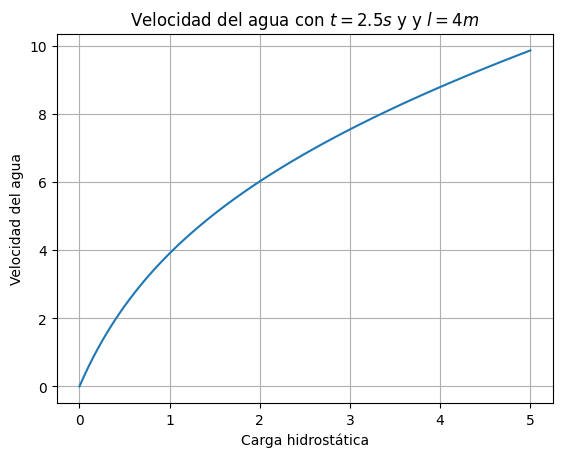

In [59]:
#b
g = 9.81
t = 2.5
l = 4
h = np.linspace(0,5,100)

plt.plot(h, velocidad(h,l,t))
plt.grid()
plt.title('Velocidad del agua con $t = 2.5s$ y y $l = 4m$')
plt.xlabel('Carga hidrostática')
plt.ylabel('Velocidad del agua')
plt.show()

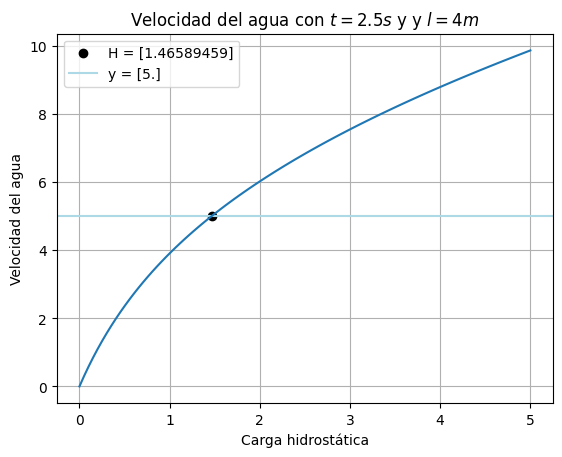

In [64]:
#c
V  = lambda h: np.sqrt(2 * g * h) * np.tanh(np.sqrt(2 * g * h) / (2 * l) * t)
V1 = lambda h: np.sqrt(2 * g * h) * np.tanh(np.sqrt(2 * g * h) / (2 * l) * t) - 5
raiz = fsolve(V1, 1)

plt.scatter(raiz, V(raiz), label = f'H = {raiz}', color = 'k')
plt.axhline(V(raiz), color = 'lightblue', label = f'y = {V(raiz)}')
plt.plot(h, V(h))
plt.grid()
plt.legend()
plt.title('Velocidad del agua con $t = 2.5s$ y y $l = 4m$')
plt.xlabel('Carga hidrostática')
plt.ylabel('Velocidad del agua')
plt.show()


Se observa que el H que se obtiene cuando la velocidad es 5 m/s es 1.465

In [66]:
#d
def bisect(f, a, b, tol):

  while(b - a)/ 2 > tol:

    c = (a + b) / 2

    if f(c) == 0:
      return c

    elif f(a) * f(c) < 0:
      b = c

    else: a = c
  return (a + b) / 2

bisect(V1, 0, 5, 1e-7)

1.465894654393196

Con el método se obtiene un resultado similar al obtenido usando fsolve

# 2

**(30 puntos)** Usualmente algunas reacciones quimicas siguen el siguiente modelo:

$$
\frac{dc}{dt} = -kc^n
$$

donde $c$ es la concentración, $t$ el tiempo, $k$ la tasa de la reacción y $n$ su orden. Usando los siguientes datos:



```python
# Datos dados
t = np.array([10, 20, 30, 40, 50, 60])
c = np.array([3.52, 2.48, 1.75, 1.23, 0.87, 0.61])
```


*a)* Conociendo que el método de diferencias finitas se puede escribir como:

###  Diferencias finitas hacia adelante:
Aproximación de primer orden:
$$
f'(x_i) \approx \frac{f(x_{i+1}) - f(x_i)}{h}
$$

### Diferencias finitas hacia atrás:
Aproximación de primer orden:
$$
f'(x_i) \approx \frac{f(x_i) - f(x_{i-1})}{h}
$$

### Diferencias finitas centradas:
Aproximación de segundo orden:
$$
f'(x_i) \approx \frac{f(x_{i+1}) - f(x_{i-1})}{2h}
$$

Escribe una función explicita que calcule $dc/dt$ usando el método de diferencias finitas a partir de los valores de $c$ y $t$, luego grafique en función de t. *Ayuda: No es necesario interpolar*

*b)* Compare el resultado anterior con `numpy.gradient`, se acercan?

*c)* Linealice la ecuación inicial (para esto puede usar log) y encuentre los valores correspondientes a $k$ y $n$



```python
# Realizar el ajuste lineal
slope, intercept, r_value, p_value, std_err = linregress(x, y)
```

*d)* Finalmente, usando los valores de $k$ y $n$ grafique $dc/dt$ y compare con los datos de la tabla. ¿Se comportan igual, determine el error máximo?




In [78]:
# Datos dados
t = np.array([10, 20, 30, 40, 50, 60])
c = np.array([3.52, 2.48, 1.75, 1.23, 0.87, 0.61])

In [132]:
def diff_fwd(c, t): #En este caso los t están equiespaciados

  h = t[1] - t[0]

  return [c[i + 1] - c[i]/ h for i in range(0, len(c))]

def diff_bwd(f, c, t):

   h = t[1] - t[0]

   return [c[i] - c[i - 1]/ h for i in range[4:-1]]

def diff_cen(f, c, t):

  h = t[1] - t[0]

  return [c[i + 1] - c[i - 1] / (2 * h) for i in range[1:-2]]



In [133]:
diff_fwd(c, t)

IndexError: index 6 is out of bounds for axis 0 with size 6

# 3
**(30 puntos)** Considere los  datos de concentración del punto anterior

```python
# Datos dados
t = np.array([10, 20, 30, 40, 50, 60])
c = np.array([5.29, 6.24, 7.02, 7.68, 8.25, 8.77])
```

*a)* Realice un gráfico de $c(t)$

*b)* Usando la interpolación de `scipy.interpolate.lagrange` y de `scipy.interpolate.CubicHermiteSpline` obtenga el polinomio interpolador de lagrange llamado `poly_lagrange` y de Hermite `poly_Hermite` para los datos datos.

*c)* Conociendo que `scipy.interpolate.lagrange` devuelve un array tipo Polynomial, use la siguiente rutina para encontrar la derivada:

``` python
from numpy.polynomial.polynomial import Polynomial

# Convertir a un objeto Polynomial para facilitar la derivación
poly_coef = Polynomial(poly_lagrange.coef[::-1])  # Convertimos los coeficientes
derivative = poly_coef.deriv()  # Calculamos la derivada
```

Luego, grafique $dc/dt$ en función del tiempo $t$ y compare con la función
$$
\frac{dc}{dt} = -kc^n
$$

con $k = 3$ y $n = -2$

*d)* Realice un gráfico del error absoluto




In [137]:
t = np.array([10, 20, 30, 40, 50, 60])
c = np.array([5.29, 6.24, 7.02, 7.68, 8.25, 8.77])
derivada = np.gradient(t,c)
derivada

array([10.52631579, 11.78613497, 14.08313908, 16.4352122 , 18.42600503,
       19.23076923])

In [142]:
P = lagrange(c, t)
Poly_lagrange

AttributeError: 'poly1d' object has no attribute 'Poly1d'